# Linear Regression

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# Load the dataset
df = pd.read_csv('students_lg.csv')

### Exploratory Data Analysis

In [36]:
df.shape

(40, 2)

In [37]:
# View the first five rows of the dataset
df.head()

,Study_Hours,Exam_Score
0,7,124
1,4,89
2,8,126
3,5,98
4,7,191


In [38]:
df.columns = ['Study Hours', 'Exam Scores']

In [39]:
# Review the dataset to check whether the column names are changed
df.head()

,Study Hours,Exam Scores
0,7,124
1,4,89
2,8,126
3,5,98
4,7,191


In [40]:
# View the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Study Hours  40 non-null     int64
 1   Exam Scores  40 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


In [41]:
# View statistical details of the dataset
df.describe()

,Study Hours,Exam Scores
count,40.00000,40.000000
mean,5.40000,102.150000
std,2.46826,46.055457
min,1.00000,16.000000
25%,3.00000,73.750000
50%,5.00000,99.000000
75%,7.25000,130.500000
max,9.00000,193.000000


### Dependent and Independent Variables

#### Independent variable

Independent variables are also called Input, Featured, Predictor Variables and is denoted on X axis. It is denoted as:-

Independent or Input Variables(X) = Feature Variables = Predictor Variables

#### Dependent Variables

Dependent variables are also called Output, Target, Responsive Variables and is denoted on Y-axis. It is denoted as:-

Dependent or Output Variables(Y) = Target Variables = Responsive variables 

In [42]:
# Declare Featured and Target variables

X = df['Study Hours'].values
Y = df['Exam Scores'].values

# Study Hours and Exam Scores data values are give to the X and Y axis respectively
# Values attributes of pandas dataframe returns a numpy array

### Visual Exploratory Data Analysis

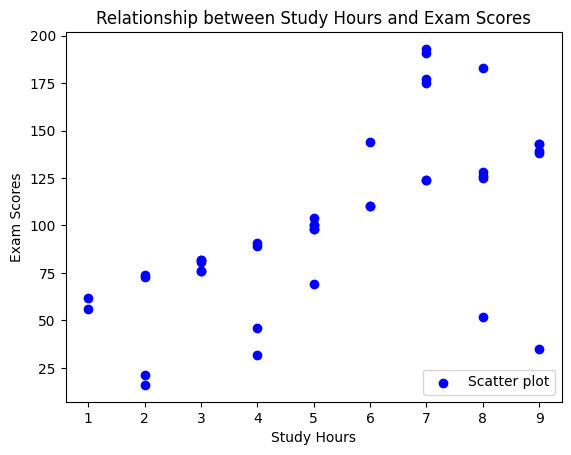

In [49]:
# Plot a scatter plot to check the distribution of data points

plt.scatter(X, Y, color = 'blue', label = 'Scatter plot')
plt.title('Relationship between Study Hours and Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.legend(loc = 4)
plt.show()

### Checking dimensions of X and Y

We need to check the dimensions of X and Y to make sure that they are in the right format for Scikit-Learn API

In [51]:
# Print the dimensions of x and Y

print(X.shape)
print(Y.shape)

(40,)
(40,)


### Reshaping X and Y

Since we are working with only one feature variable, so we need to reshape it using Numpy reshape() method.

It specifies first dimensions to be -1, which means "unspecified".

Its values is inferred form the length of the array and the remaining dimensions.

In [53]:
# Reshape X and Y

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

In [58]:
# Print the dimensions of X and Y after reshaping 

print(X.shape)
print(Y.shape)

(40, 1)
(40, 1)


### Difference in dimensions of X and Y after reshaping

Diffecrence in dimensions of X and Y before and after reshaping is clearly visible. It is important to do so because getting the right feature and target variable is an important step towards model building

### Train Test Split

We will divide the dataset into two sets: train set and test set. The model learns the relationship from training data and predict on test data 

In [59]:
# Split the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [61]:
# Print the dimensions of X_train, X_test, Y_train, Y_test
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(28, 1)
(28, 1)
(12, 1)
(12, 1)


### Mechanics of the model

We split the dataset into two set- the training set and the testing set. Then we instigate the regressor lm and fit it on the training set with the fit method.

In this step the model learns the relationship between the training data(X_train, Y_train).

Now the model is ready to make predictions on the test data(X_test).

In [62]:
# Fit the linear model
# Instantiate the Linear Regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Train the model using training set
lm.fit(X_train, Y_train)

# Predict on the test data
Y_pred = lm.predict(X_test)

### Model slope and intercept term

The model slope is given by lm.coef_ and model intercept is given by lm.intercept_.

In [63]:
# Compute model slope and intercept
a = lm.coef_
b = lm.intercept_
print("Estimated model slope, a:", a)
print("Estimated model intercept, b:", b)

Estimated model slope, a: [[11.32663092]]
Estimated model intercept, b: [38.73637176]


**So the equation of our line is y = 11.32663092*x + 38.73637176**

### Making Predictions

In [75]:
# Predicting the Scores
lm.predict(X)[0:5]
# Predicting the Scores on the first five hours of study

array([[118.0227882 ],
       [ 84.04289544],
       [129.34941912],
       [ 95.36952636],
       [118.0227882 ]])

In [76]:
# To make an individual prediction using linear regression model.
print(str(lm.predict([[10]])))

[[152.00268097]]


### Regression Metrics for model performance

There are two ways to evaluate model performance. They are RMSE(Root Mean Square Error) and R-Squared value.

### RMSE

In [77]:
# Calculate and print RMSE

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 52.3447


### R2 Scores

In [78]:
# calculate and print R2 Scores

from sklearn.metrics import r2_score
print("R2 Score: {:.4f}".format(r2_score(Y_test, Y_pred)))

R2 Score: 0.2362


### Interpretation and Conclution

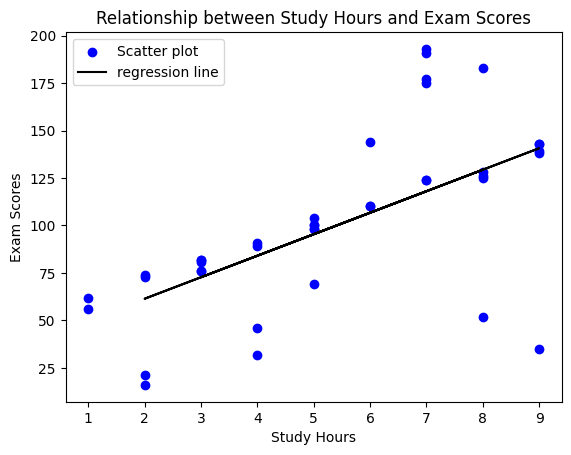

In [91]:
# Plot the regression line
plt.scatter(X, Y, color = 'blue', label = 'Scatter plot')
plt.plot(X_test, Y_pred, color = 'black', label = 'regression line')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.title('Relationship between Study Hours and Exam Scores')
plt.legend(loc = 0)
plt.show()

### Residual Analysis

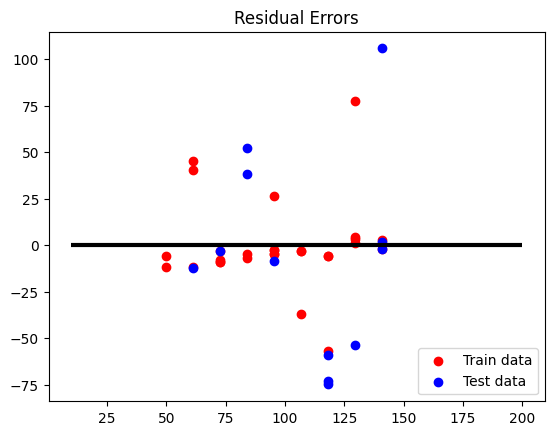

In [104]:
# Plotting residual errors

plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 10, xmax = 200, y = 0, linewidth = 3, color = 'black')
plt.title('Residual Errors')
plt.legend(loc = 4)
plt.show()


### Checking for Overfitting and Underfitting

In [105]:
# Check for Overfitting and underfitting
print("Training set score: {:.4f}".format(lm.score(X_train, Y_train)))
print("Test set score: {:.4f}".format(lm.score(X_test, Y_test)))

Training set score: 0.5642
Test set score: 0.2362


In [108]:
# Save model for future use

import joblib
joblib.dump(lm, 'linear_regression_model.pkl')

# To load the model
# lm2 = joblib.load('lm_regression_model.pkl')

['linear_regression_model.pkl']

### Simple Linear Regression - Model Assumptions
The Linear Regression Model is based on several assumptions which are listed below:-

i. Linear relationship ii. Multivariate normality iii. No or little multicollinearity iv. No auto-correlation v. Homoscedasticity

#### i. Linear relationship
The relationship between response and feature variables should be linear. This linear relationship assumption can be tested by plotting a scatter-plot between response and feature variables.

#### ii. Multivariate normality
The linear regression model requires all variables to be multivariate normal. A multivariate normal distribution means a vector in multiple normally distributed variables, where any linear combination of the variables is also normally distributed.

#### iii. No or little multicollinearity
It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are highly correlated.

#### iv. No auto-correlation
Also, it is assumed that there is little or no auto-correlation in the data. Autocorrelation occurs when the residual errors are not independent from each other.

#### v. Homoscedasticity
Homoscedasticity describes a situation in which the error term (that is, the noise in the model) is the same across all values of the independent variables. It means the residuals are same across the regression line. It can be checked by looking at scatter plot.